## Data Science Bootcamp - Graded Datathon 
# Mansi

importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


let's read our training dataset in pandas's dataframe

In [2]:

tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

now, we need to study the variables of our dataset to understand what our dataset contains. and to perform exploratory data analysis on our dataset

In [3]:
# head() give us top 5 datapoints of our dataset .one can also give value in the parenthesis() of how many datapoint one want to see
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [4]:
tax_data.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican
802,635,189020,839546,2,4,56,1,0,0,0,Republican


 To understand our dataset we should know what a column contains in it,that's what we called as data description . only than we can do feature selection  and exploratory data analysis.

# Data Description

HHI: Household income (the total amount of money earned by every member of a single household)

HHDL: Household debt level  (all liabilities of households (including non-profit institutions serving households) that require payments of interest or principal by households to the creditors at a fixed dates in the future)

Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage. (0= single,1= married, 2= divorced)

PoliticalParty: Name of the political party

CollegeGrads: Grade in College out of 5

AHHAge: Average household age

cars: number of cars in house

Filed in YYYY: Tax filed in given year YYYY

In [5]:
tax_data.info()
#.info() will give us the datatype of each column and the number of non null entries and the memory used in storing them. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


we can see that we have no null entries in our dataset, which is amazing for us as now we don't have to deal with the null values.

In [6]:
tax_data.describe()
# describe() will give us the stastical measures of our dataset like
#mean,standard deviation(std) , minimum, maximum and the percentiles 

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


so, we have no null values in our dataset. our next move should be finding outliers in our dataset. one can get the idea of this by looking at the stastical measures from above output because outliers effect mean the most . we can have a look at the max and mean value and then at the mean .
we can plot boxplot to check the outliers 

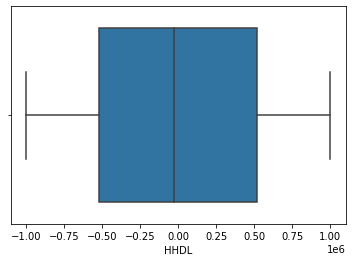

In [7]:

ax = sns.boxplot(x=tax_data["HHDL"])

so, we have no outliers in the column HHDL

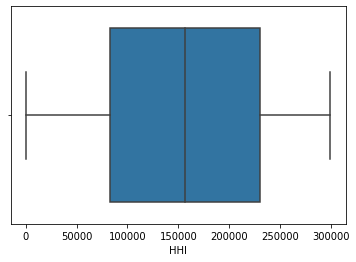

In [8]:
ax = sns.boxplot(x=tax_data["HHI"])

after plotting some box plots and having a look at the stastical measures we can tell that we have no outliers in our dataset.
now, our next step should be feature selection.


In [9]:
correlation= tax_data.corr()

In [10]:
print(correlation)

               Unnamed: 0       HHI      HHDL   Married  CollegGrads  \
Unnamed: 0       1.000000 -0.044713  0.042304  0.000487     0.045215   
HHI             -0.044713  1.000000 -0.013745 -0.007374    -0.029947   
HHDL             0.042304 -0.013745  1.000000 -0.039531     0.015394   
Married          0.000487 -0.007374 -0.039531  1.000000    -0.012980   
CollegGrads      0.045215 -0.029947  0.015394 -0.012980     1.000000   
AHHAge           0.047690  0.029051  0.051930  0.029995     0.036692   
Cars             0.041287  0.025449  0.016308 -0.020007    -0.000744   
Filed in 2017    0.055262  0.061525  0.035499 -0.056867    -0.046625   
Filed in 2016    0.012946  0.040308  0.022683  0.054926     0.034875   
Filed in 2015   -0.017110  0.027026  0.029971 -0.028267     0.032438   

                 AHHAge      Cars  Filed in 2017  Filed in 2016  Filed in 2015  
Unnamed: 0     0.047690  0.041287       0.055262       0.012946      -0.017110  
HHI            0.029051  0.025449       0.061

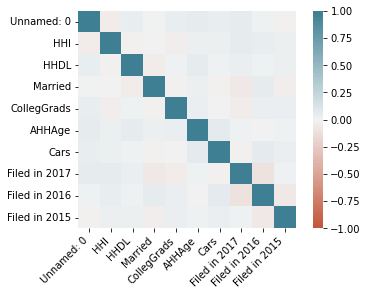

In [11]:
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

one thing which i can see from this heatmap is that we have no negative correlation or super positive correlation with any of the variables .basically stastical correlation. it doesn't mean that label is not dependent on the variables.

# let's separate our labels and the target

In [12]:

x=tax_data.drop(['Unnamed: 0', 'PoliticalParty'], axis = 1)
  

In [13]:
print(x)

        HHI    HHDL  Married  CollegGrads  AHHAge  Cars  Filed in 2017  \
0    183414  -12402        1            2      28     1              0   
1    129786  700251        2            5      63     3              0   
2    268343  493411        2            4      44     1              1   
3    290506 -433408        1            1      28     5              1   
4     90108  907135        1            3      57     5              1   
..      ...     ...      ...          ...     ...   ...            ...   
798  153304  971909        0            1      99     5              1   
799  136652 -184616        1            2      31     3              1   
800   51066 -900262        1            1      67     4              0   
801  123721  -51448        2            0      23     4              0   
802  189020  839546        2            4      56     1              0   

     Filed in 2016  Filed in 2015  
0                0              1  
1                0              0  
2  

In [14]:
y=tax_data[[ 'PoliticalParty']].copy()


In [15]:
print(y)

    PoliticalParty
0         Democrat
1       Republican
2      Independent
3       Republican
4         Democrat
..             ...
798       Democrat
799       Democrat
800       Democrat
801     Republican
802     Republican

[803 rows x 1 columns]


## splitting our dataset into training and text data

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

## training the linear regression model

In [17]:
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## evaluation of our model

In [19]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [20]:
print("accuracy score of traing data:",training_data_accuracy)


accuracy score of traing data: 0.35046728971962615


so, we have a very low accuracy score for our linear regression model

# training decision tree model

In [21]:
#from sklearn import tree

In [22]:
#model = tree.DecisionTreeClassifier()

In [23]:
#model.fit(x_train, y_train)

let's check accuracy score of decision tree model

In [24]:
#x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [25]:
#print("accuracy score of traing data:",training_data_accuracy)


i can see that it is over fitted. but let's check it on testing data also

In [26]:
#x_test_prediction=model.predict(x_test)
#testing_data_accuracy=accuracy_score(x_test_prediction, y_test)


In [27]:
#print("accuracy score of testing data:",testing_data_accuracy)

**so , we can see that our model is over fitted**

## training SVM model

In [28]:
#from sklearn import svm

In [29]:
#model= svm.SVC()

In [30]:
#model.fit(x_train, y_train)

now, lets check accuracy score of SVM model

In [31]:
#x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [32]:
#print("accuracy score of trainig data:",training_data_accuracy)

## making prediction system

In [33]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [34]:
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [35]:
test_data=test_data.drop(['Unnamed: 0'], axis = 1)

In [36]:
predictions= model.predict(test_data)

In [37]:
print(predictions)

['Independent' 'Republican' 'Republican' 'Republican' 'Republican'
 'Independent' 'Independent' 'Independent' 'Republican' 'Independent'
 'Independent' 'Republican' 'Republican' 'Republican' 'Republican'
 'Independent' 'Independent' 'Republican' 'Independent' 'Independent'
 'Republican' 'Republican' 'Independent' 'Republican' 'Republican'
 'Republican' 'Republican' 'Independent' 'Republican' 'Republican'
 'Independent' 'Independent' 'Independent' 'Republican' 'Republican'
 'Independent' 'Republican' 'Independent' 'Independent' 'Republican'
 'Republican' 'Independent' 'Republican' 'Republican' 'Independent'
 'Independent' 'Republican' 'Republican' 'Independent' 'Republican'
 'Republican' 'Republican' 'Republican' 'Republican' 'Independent'
 'Independent' 'Republican' 'Republican' 'Independent' 'Republican'
 'Republican' 'Independent' 'Independent' 'Independent' 'Republican'
 'Republican' 'Independent' 'Republican' 'Independent' 'Independent'
 'Independent' 'Independent' 'Independent' 'I

In [38]:
res = pd.DataFrame(predictions)

In [39]:
res.index = test_data.index 

In [40]:
res.columns = ["prediction"]

In [41]:
print(res)

      prediction
0    Independent
1     Republican
2     Republican
3     Republican
4     Republican
..           ...
196   Republican
197  Independent
198   Republican
199   Republican
200   Republican

[201 rows x 1 columns]


In [42]:
from google.colab import files


In [43]:
res.to_csv('prediction_results.csv')         


In [44]:
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## KNN model

In [45]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(x_train, y_train)

In [46]:
#x_train_prediction=model.predict(x_train)
#training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [47]:
print("accuracy score of traing data:",training_data_accuracy)

accuracy score of traing data: 0.35046728971962615


till now , we have got best accuracy from KNN model 

In [48]:
#x_test_prediction=model.predict(x_test)
#testing_data_accuracy=accuracy_score(x_test_prediction, y_test)

In [49]:
#print("accuracy score of testing data:",testing_data_accuracy)